In [174]:
import pandas as pd
import matplotlib as pyplot
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [175]:
# Reference csv file paths
movie_return_path = "movie_return.csv"
review_path = "book_to_film_adaptations.csv"
movies_path = "Raw_Data/movies_metadata.csv"

# Import csv files as DataFrames

movie_return = pd.read_csv(movie_return_path, encoding="utf-8")
reviews = pd.read_csv(review_path, encoding="utf-8")
movies_df = pd.read_csv(movies_path, encoding="utf-8")
movie_return.head(1)

,Unnamed: 0,id,movie keywords,movie budget,movie genre,movie original language,movie release date,movie revenue,movie runtime,movie spoken languages,vote_average,movie title,movie rating,book authors,book rating,book pages,book publisher,book ratings sum,movie return
0,0,4584,"[{'id': 420, 'name': 'bowling'}, {'id': 818, '...",16500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,1995-12-13,135000000.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.2,Sense and Sensibility,3.95,Jane Austen/Claudia L. Johnson,4.07,269,W. W. Norton & Company,1773,8.181818


In [176]:
#movie_return["book publisher"].value_counts()

In [177]:
#penguin = movie_return[movie_return["book publisher"] == 'W. W. Norton & Company']

In [178]:
subset = movie_return[['book publisher', 'movie return']]
grouped_df = subset.groupby('book publisher').mean('movie return')
grouped_df.sort_values(by = ['movie return'], ascending=False, inplace = True)
grouped_df.reset_index(inplace = True)
grouped_df.head(1)

,book publisher,movie return
0,Pocket Books,18.777778


Of the 50 book-to-movie adaptations with revenue data, 41 were published by unique publishers. There are only a handful of book publishers who enjoyed the success of more than one book becoming a film. Penguin Books is an outlier, with four books published over the years: The Scarlet Letter, The Joy Luck Club, On the Road & Wuthering Heights.   

Publishers Pocket Books, British Film Institute & W. W. Norton & Company brought the greatest ROI to movie companies through their books, eventually made into the films: "Carrie", "The Silence of the Lambs", "Wizard of Oz" and "Sense and Sensibility" respectively. 	

In [179]:
# Visualize publisher data vs. movie return
#grouped_df.plot('book publisher', 'movie return', kind='bar', figsize=(30,8), rot=80)
#plt.title('Movie Return by Book Publisher');

In [180]:
# Visualize title  vs. book vs. movie ratings
review_subset = reviews[['movie title', 'book rating', 'movie rating']]
grouped_reviews = review_subset.groupby('movie title').mean('movie rating')
grouped_reviews.sort_values(by = ['movie rating'], ascending=False, inplace = True)
grouped_reviews = grouped_reviews.reset_index()
grouped_reviews

,movie title,book rating,movie rating
0,Ricochet,3.97,5.00
1,Don Quixote,3.87,4.25
2,To Kill a Mockingbird,4.27,4.16
3,The Silence of the Lambs,4.27,4.15
4,Rebecca,4.23,4.07
...,...,...,...
100,The Mysteries of Pittsburgh,3.64,2.50
101,A Tale of Two Cities,3.84,2.50
102,Rage of Angels,3.93,2.50
103,Gulliver's Travels,3.57,1.67


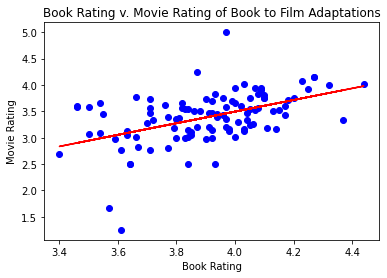

The r-value is: 0.4813170546977566


In [181]:
# Determine x & y values
x_values = grouped_reviews['book rating']
y_values = grouped_reviews['movie rating']

 # Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
# Plot scatter
plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Book Rating')
plt.ylabel('Movie Rating')
marker_size=20
plt.title('Book Rating v. Movie Rating of Book to Film Adaptations')
plt.show()
#H1: r2 != 0 (correlation)
#H0: r2 = 0 (no correlation)

# Print r value
print(f"The r-value is: {rvalue}")
# For further evaluation

Looking at the graph, there is a positive correlation between book and movie rating. Because the rvalue is .4, a positive correlation exists, but it is not strong. 48% of the variability in movie ratings of adaptations is explained by the book rating, assuming that all assumptions of OLS is true. This shows that there are other factors influencing the book rating that we would have to build into our model as well. 

In [182]:
# Visualize title  vs. movie return
movie_return_subset = reviews[['movie title', 'book rating', 'movie return']]
grouped_return = movie_return_subset.groupby('movie title').mean('movie return')
grouped_return.sort_values(by = ['movie return'], ascending=False, inplace = True)
grouped_return

,book rating,movie return
movie title,,
Carrie,3.96,18.777778
The Silence of the Lambs,4.27,14.354891
The Wizard of Oz,4.00,12.155192
Sense and Sensibility,4.07,8.181818
To Kill a Mockingbird,4.27,6.564923
...,...,...
The Stone Raft,3.80,NaN
The Stranger,3.98,NaN
The Woman in Black,3.71,NaN


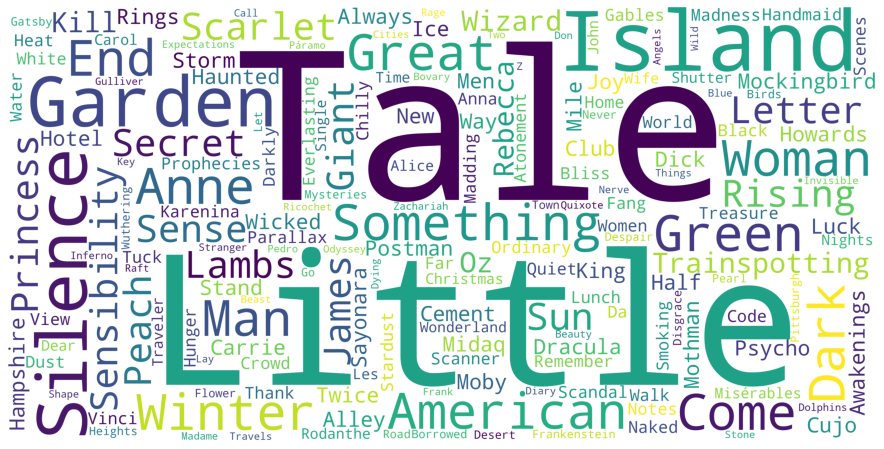

In [183]:
# Wordcloud on movie title for adaptations
# conda install -c conda-forge wordcloud
reviews['movie title'] = reviews['movie title'].astype('str')
title_group = ' '.join(reviews['movie title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_group)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The wordcloud for film adaptations shows that 'Little', 'Garden', 'Island', 'Tale' are commonly occuring words. This shows some key themes like adventure, place and  running throughout film adaptations.

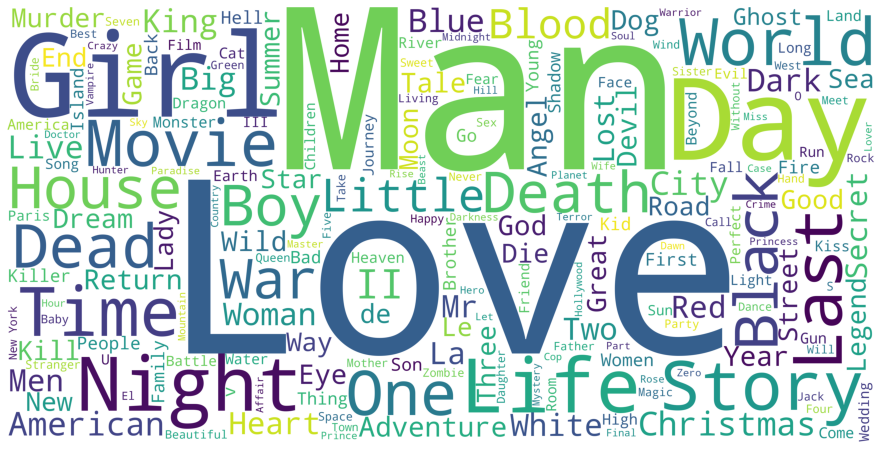

In [217]:
# Wordcloud on movie title for all films
movies_df['title'] = movies_df['title'].astype('str')
title_group = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_group)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

The wordcloud for all films shows that 'Love', 'Girl' and 'Man' are commonly occuring words. This shows that  prominent key themes running throughout film adaptations.

In [184]:
# Create a box and whisker plot for review scores of adaptations compared to review scores of all movies
# Calculate means for adaptation reviews (sample) & all movie reviews (population)
# Get pvalue: if pvalue < .05 then we reject H0
# H0: x(adaptations) = x(population)
# H1: x(adaptations) != x(population)

#steps
# population df = movies_df[vote_average]
# sample df = reviews['vote_average']

In [185]:
reviews['vote_average'].describe()

count    105.000000
mean       6.445714
std        1.220421
min        0.000000
25%        5.800000
50%        6.600000
75%        7.200000
max       10.000000
Name: vote_average, dtype: float64

In [186]:
movies_df['vote_average'].describe()

count    45460.000000
mean         5.618207
std          1.924216
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

In [216]:
movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [188]:
# Create subsets of data for plotting
imdb_votes_reviews = reviews[['movie title', 'vote_average']]
imdb_votes_reviews = imdb_votes_reviews.rename(columns = {'vote_average': 'Adaptation Films'})

imdb_votes_movies = movies_df[['title', 'vote_average']]
imdb_votes_movies = imdb_votes_movies.rename(columns = {'title': "movie title", 
                                                        'vote_average': 'All Films'})

In [189]:
# Merge dfs
votes_merge = pd.merge(imdb_votes_movies, imdb_votes_reviews,  how = 'left', on = 'movie title')
votes_merge = votes_merge[['Adaptation Films', 'All Films']]

In [190]:
votes_merge.head()

,Adaptation Films,All Films
0,NaN,7.7
1,NaN,6.9
2,NaN,6.5
3,NaN,6.1
4,NaN,5.7


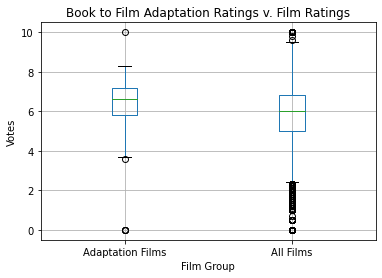

In [192]:
# Generate a box plot of adaptation votes v. total film votes from imdb
plt.title('Book to Film Adaptation Ratings v. Film Ratings')
plt.ylabel('Votes')
plt.xlabel('Film Group')
votes_merge.boxplot(column=["Adaptation Films", "All Films"])
plt.show()

#### Get p-value
Assumptions
- Data is normally distributed
- Data is independent
- Data is randomly sampled

In [193]:
def moviedata(loc=0):
    sample = votes_merge['Adaptation Films']
    population = votes_merge['All Films']

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

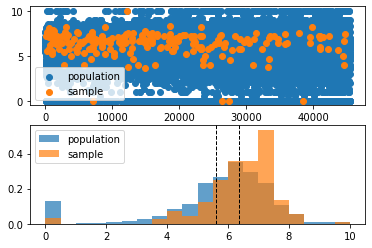

In [172]:
# Plot moviedata in scatter and histogram
population, sample = moviedata()

In [211]:
# Drop NaN values for t-test
sample.dropna(inplace = True)

In [212]:
# Run one sample t-test
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=8.333635521004798, pvalue=8.03194619929397e-15)

Ratings for book to film adaptations have a different mean than for all films, proving our hypothesis. 